# 第一回

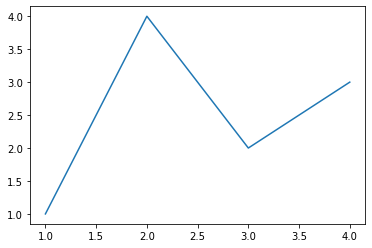

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

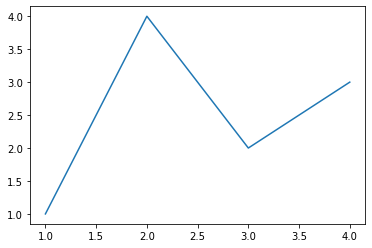

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

一个完整的matplotlib图像包括四个层级（容器）：  
* Figure 一个figure由一个或多个子图组成
* Axes 子图
* Axis axes的下属层级，与坐标轴、网格有关的元素
* Tick axis的下属层级，与刻度有关的元素

两种绘图接口：  
1. OO模式(object-oriented style)，显式创建figure和axes fig, ax = plt.subplots() ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
2. 依赖pyplot自动创建figure和axes，并绘图 plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

【例子】

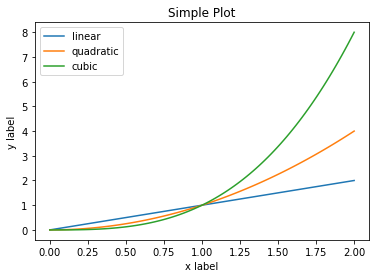

In [4]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  
ax.plot(x, x, label='linear')  
ax.plot(x, x**2, label='quadratic')  
ax.plot(x, x**3, label='cubic')  
ax.set_xlabel('x label') 
ax.set_ylabel('y label') 
ax.set_title("Simple Plot")  
ax.legend() 

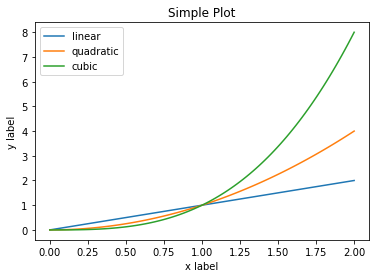

In [4]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear') 
plt.plot(x, x**2, label='quadratic')  
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

# 第二回

## 概述

### matplotlib有三个层次的API：

 `matplotlib.backend_bases.FigureCanvas`代表了绘图区，所有的图像都是在绘图区完成的。  
`matplotlib.backend_bases.Renderer`代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。  
`matplotlib.artist.Artist` 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。 

### Artist的分类

Artist有两种类型：`primitives`和`containers`      
`primitives`是基本要素，包含了在绘图区作图用到的标准图形对象，如**曲线Line2D，文字text，矩形Rectangle，图像image**等。  
`container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**。    
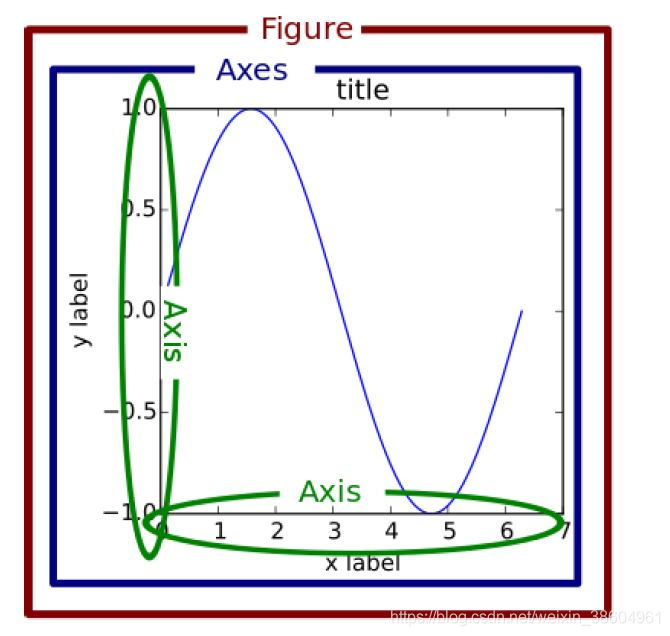

### matplotlib标准用法

matplotlib的标准使用流程为： 
* 创建一个`Figure实例`  
* 使用`Figure`实例创建一个或者多个`Axes`或`Subplot`实例  
* 使用`Axes`实例的辅助方法来创建`primitive` 

值得一提的是，Axes是一种容器，它可能是matplotlib API中最重要的类，并且我们大多数时间都花在和它打交道上。更具体的信息会在第三节容器小节说明。

一个流程示例及说明如下：

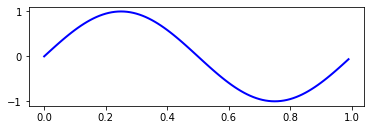

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

# step 3
# 然后用Axes实例的方法画了一条曲线
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

## 基本元素 - primitives

各容器中可能会包含多种`基本要素-primitives`, 所以先介绍下primitives，再介绍容器。

本章重点介绍下`primitives`的几种类型：**曲线-Line2D，矩形-Rectangle，图像-image**（其中文本-Text较为复杂，会在之后单独详细说明。） 

### 2DLines

在matplotlib中曲线的绘制，主要是通过类`matplotlib.lines.Line2D`来完成的。
它的基类:` matplotlib.artist.Artist`

matplotlib中`线-line`的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响，比如，我们可以创建虚线种类的线。

它的构造函数：
> class matplotlib.lines.Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)

其中常用的的参数有：
* **xdata** : 需要绘制的line中点的在x轴上的取值，若忽略，则默认为`range(1,len(ydata)+1)`
* **ydata** : 需要绘制的line中点的在y轴上的取值
* **linewidth** : 线条的宽度
* **linestyle** : 线型
* **color** : 线条的颜色
* **marker** : 点的标记，详细可参考`markers API`
* **markersize** : 标记的`size`

1. 如何设置Line2D的属性 

有三种方法可以用设置线的属性:
* 直接在`plot()`函数中设置
* 通过获得线对象，对线对象进行设置
* 获得线属性，使用`setp()`函数设置

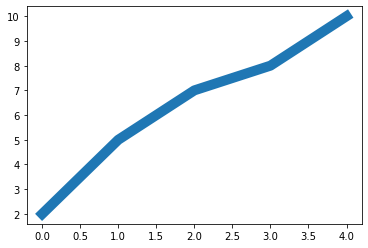

In [10]:
# 1) 直接在plot()函数中设置
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10) # 设置线的粗细参数为10

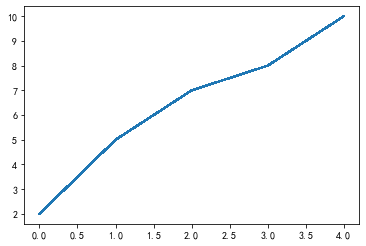

In [17]:
# 2) 通过获得线对象，对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿功能

[None, None]

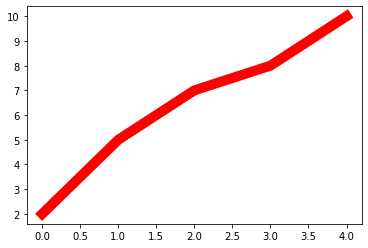

In [13]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10)

2. 如何绘制lines

* **绘制直线line**
* **errorbar绘制误差折线图**

**绘制直线line常用的方法有两种:**
* `pyplot`方法绘制
* `Line2D`对象绘制

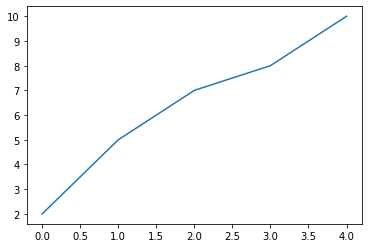

In [14]:
# 1. pyplot方法绘制
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y)

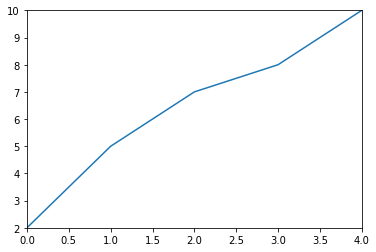

In [15]:
# 2. Line2D对象绘制
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

fig = plt.figure()
ax = fig.add_subplot(111)
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

plt.show()

**errorbar绘制误差折线图**  
`pyplot`里有个专门绘制误差线的功能，通过`errorbar`类实现，它的构造函数：  
>matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs) 

其中最主要的参数是前几个:
* **x**：需要绘制的line中点的在x轴上的取值
* **y**：需要绘制的line中点的在y轴上的取值
* **yerr**：指定y轴水平的误差
* **xerr**：指定x轴水平的误差
* **fmt**：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’
* **ecolor**：指定error bar的颜色
* **elinewidth**：指定error bar的线条宽度

绘制errorbar

<ErrorbarContainer object of 3 artists>

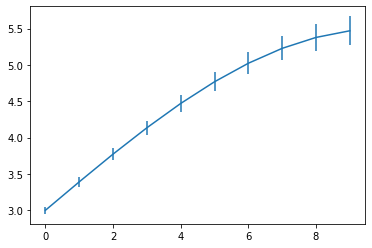

In [16]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

### patches

`matplotlib.patches.Patch`类是二维图形类。它的基类是`matplotlib.artist.Artist`，它的构造函数：
详细清单见 matplotlib.patches API

>Patch(edgecolor=None, facecolor=None, color=None, linewidth=None, linestyle=None, antialiased=None, hatch=None, fill=True, capstyle=None, joinstyle=None, **kwargs)

#### Rectangle-矩形

`Rectangle`矩形类在官网中的定义是： 通过锚点xy及其宽度和高度生成。 `Rectangle`本身的主要比较简单，即xy控制锚点，`width`和`height`分别控制宽和高。它的构造函数：
>class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)

在实际中最常见的矩形图是**hist直方图和bar条形图**。

**hist-直方图**
>matplotlib.pyplot.hist(x,bins=None,range=None, density=None, bottom=None, histtype='bar', align='mid', log=False, color=None, label=None, stacked=False, normed=None)  

下面是一些常用的参数：  
* **x**: 数据集，最终的直方图将对数据集进行统计
* **bins**: 统计的区间分布
* **range**: tuple, 显示的区间，range在没有给出bins时生效
* **density**: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
* **histtype**: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
* **align**: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
* **log**: bool，默认False,即y坐标轴是否选择指数刻度
* **stacked**: bool，默认为False，是否为堆积状图

(0.0, 100.0)

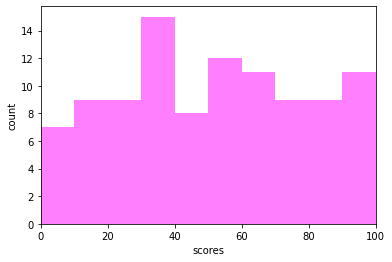

In [17]:
import matplotlib.pyplot as plt
import numpy as np 
x=np.random.randint(0,100,100) #生成[0-100)之间的100个数据,即 数据集 
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100)#设置x轴分布范围 plt.show()

### images

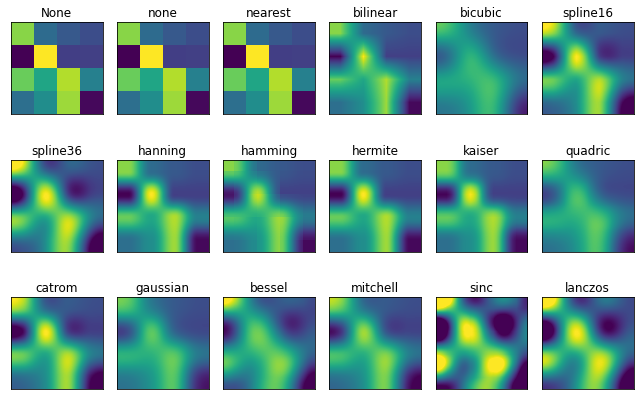

In [18]:
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

## 对象容器 - Object container

### Figure容器

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <Axes:>]


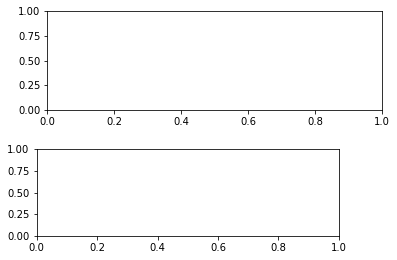

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的

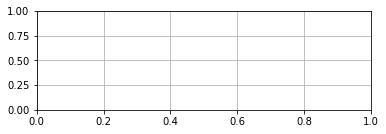

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)
    

### Axes容器

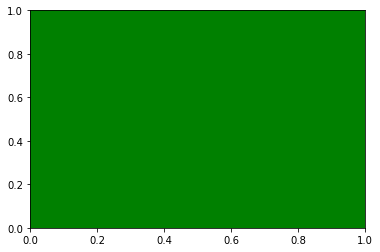

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

### Axis容器

array([-0.2,  4.2])

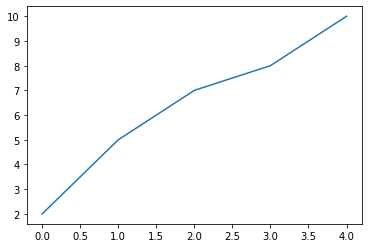

In [23]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔

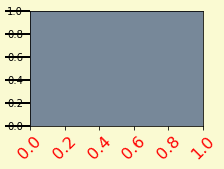

In [24]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_color('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

plt.show()

### Tick容器

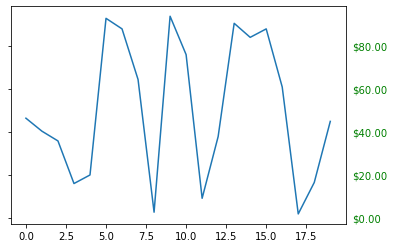

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()

# 第三回

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

## 子图

### 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列
* `figsize`参数可以指定整个画布的大小
* `sharex`和`sharey`分别表示是否共享横轴和纵轴刻度
* `tight_layout`函数可以调整子图的相对大小使字符不会重叠

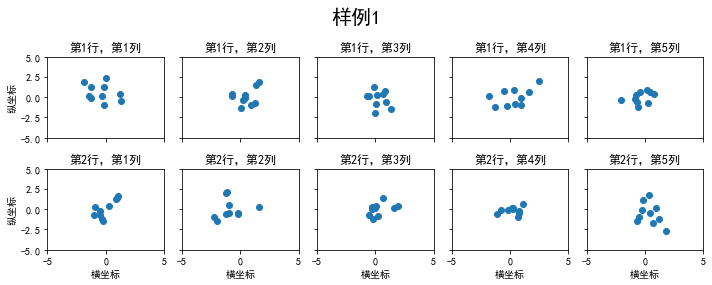

In [2]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

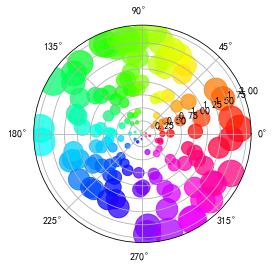

In [3]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### 使用`GridSpec`绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态。

利用`add_gridspec`可以指定相对宽度比例`width_ratios`和相对高度比例参数 `height_ratios`。

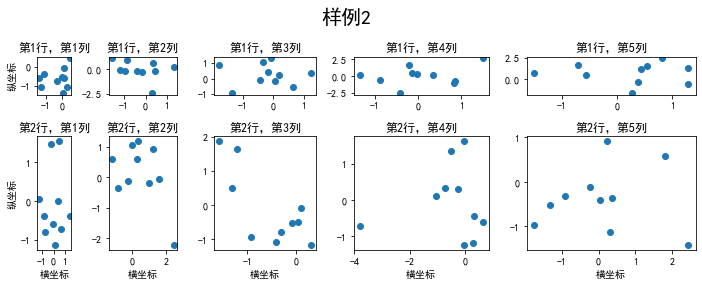

In [4]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了`spec[i, j]`的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能。

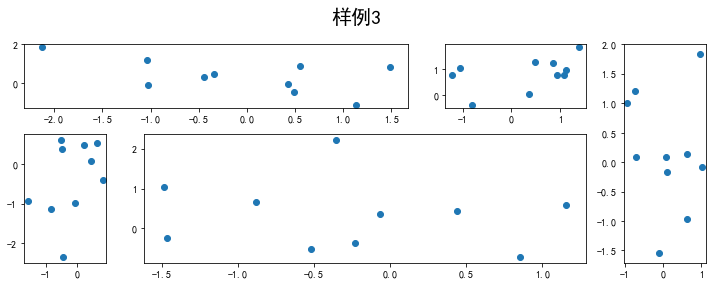

In [5]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 子图上的方法

在`ax`对象上定义了和`plt`类似的图形绘制函数，常用的有：`plot, hist, scatter, bar, barh, pie`。

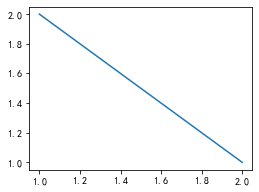

In [6]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])

(array([  6.,  25.,  89., 187., 266., 217., 140.,  56.,  12.,   2.]),
 array([-3.14705228, -2.48199554, -1.81693881, -1.15188207, -0.48682534,
         0.1782314 ,  0.84328813,  1.50834486,  2.1734016 ,  2.83845833,
         3.50351507]),
 <BarContainer object of 10 artists>)

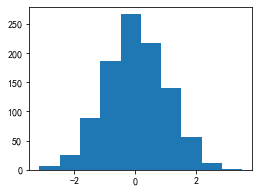

In [8]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

常用直线的画法为：`axhline, axvline, axline` （水平、垂直、任意方向）

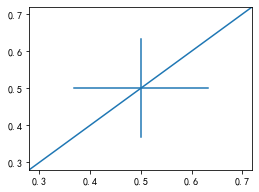

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7])

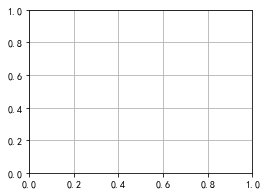

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

使用`set_xscale`, `set_title`, `set_xlabel`分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名。

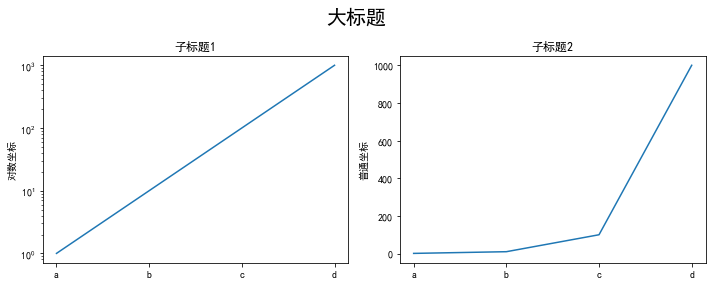

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('大标题', size=20)
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('对数坐标')
    else:
        axs[j].set_title('子标题2')
        axs[j].set_ylabel('普通坐标')
fig.tight_layout()

与一般的`plt`方法类似，`legend`, `annotate`, `arrow`, `text`对象也可以进行相应的绘制。

Text(0.8, 0.2, '这是中点')

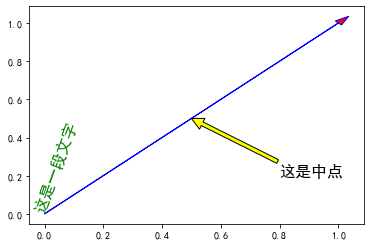

In [14]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue')
ax.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green')
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16)

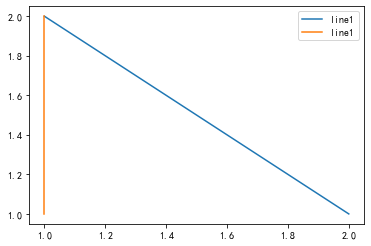

In [15]:
fig, ax = plt.subplots()
ax.plot([1,2],[2,1],label="line1")
ax.plot([1,1],[1,2],label="line1")
ax.legend(loc=1)

其中，图例的`loc`参数如下：

|string|code|
|:----:|:----:|
|best|0|
|upper right|1|
|upper left|2|
|lower left|3|
|lower right|4|
|right|5|
|center left|6|
|center right|7|
|lower center|8|
|upper center|9|
|center|10|

# 第四回：文字图例

## Figure和Axes上的文本

Matplotlib具有广泛的文本支持，包括对数学表达式的支持、对栅格和矢量输出的TrueType支持、具有任意旋转的换行分隔文本以及Unicode支持。

下面的命令是介绍了通过pyplot API和objected-oriented API分别创建文本的方式。

|pyplot API|OO API|description|
|:----:|:----:|:----:|
|text|text|在 Axes的任意位置添加text。|
|title|	set_title|在 Axes添加title|
|figtext|text|在Figure的任意位置添加text.|
|suptitle|suptitle|在 Figure添加title|
|xlabel|set_xlabel|在Axes的x-axis添加label|
|ylabel|set_ylabel|在Axes的y-axis添加label|

### text

**pyplot API**：matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)
**OO API**:Axes.text(self, x, y, s, fontdict=None, **kwargs)

**参数：此方法接受以下描述的参数：**  
* s:此参数是要添加的文本。
* xy:此参数是放置文本的点(x，y)。
* fontdict:此参数是一个可选参数，并且是一个覆盖默认文本属性的字典。如果fontdict为None，则由rcParams确定默认值。

**返回值：此方法返回作为创建的文本实例的文本。**

fontdict主要参数具体介绍，更多参数请参考官网说明：

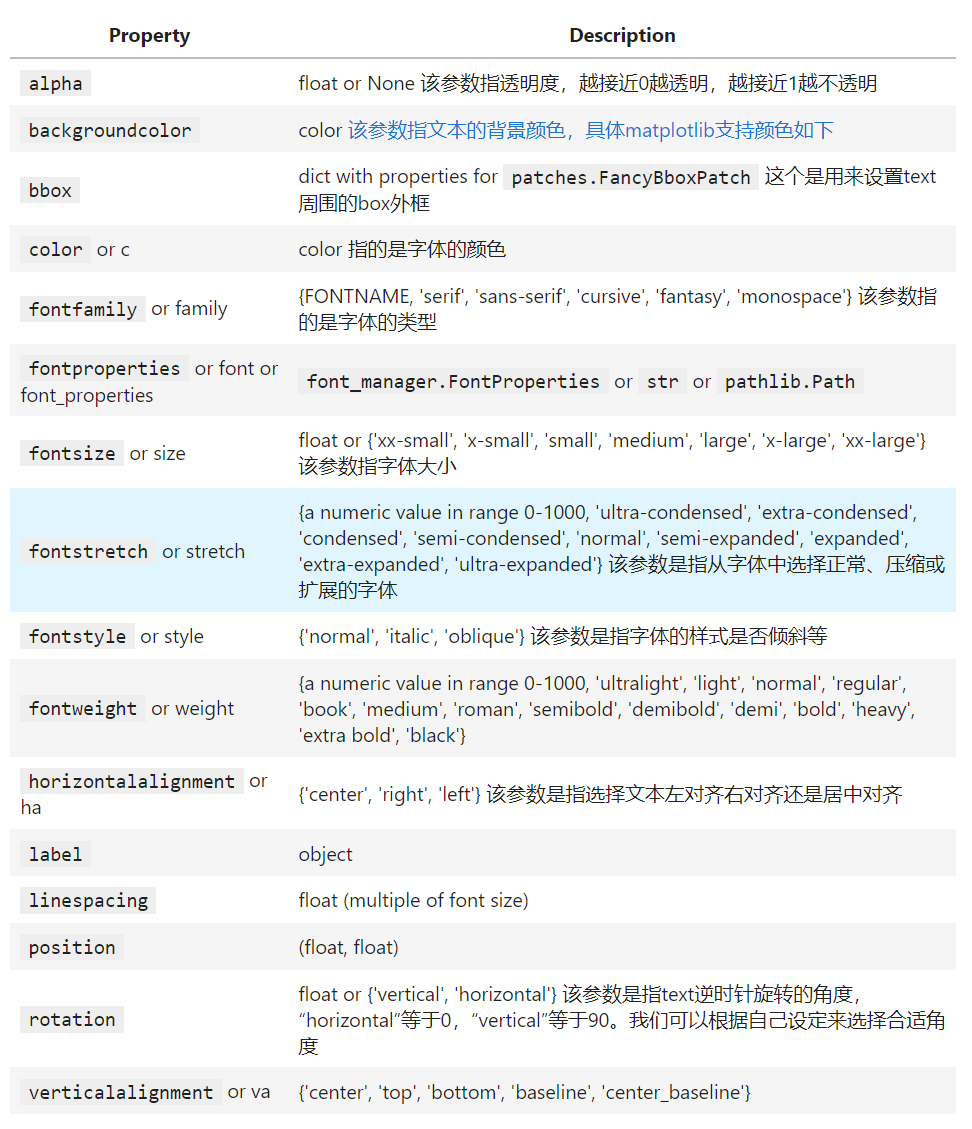

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

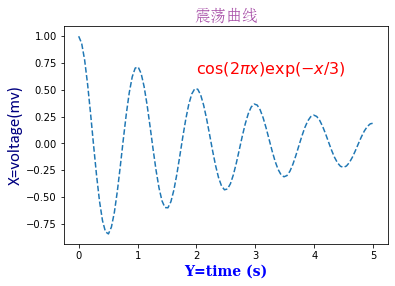

In [4]:
#fontdict学习的案例
#学习的过程中请尝试更换不同的fontdict字典的内容，以便于更好的掌握
#---------设置字体样式，分别是字体，颜色，宽度，大小
font1 = {'family': 'SimSun',#华文楷体
         'alpha':0.7,#透明度
        'color':  'purple',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'Times New Roman',
        'color':  'red',
        'weight': 'normal',
        'size': 16,
        }
font3 = {'family': 'serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 14,
        }
font4 = {'family': 'Calibri',
        'color':  'navy',
        'weight': 'normal',
        'size': 17,
        }
#-----------四种不同字体显示风格-----
 
#-------建立函数----------
x = np.linspace(0.0, 5.0, 100)
y = np.cos(2*np.pi*x) * np.exp(-x/3)
#-------绘制图像，添加标注----------
plt.plot(x, y, '--')
plt.title('震荡曲线', fontdict=font1)
#------添加文本在指定的坐标处------------
plt.text(2, 0.65, r'$\cos(2 \pi x) \exp(-x/3)$', fontdict=font2)
#---------设置坐标标签
plt.xlabel('Y=time (s)', fontdict=font3)
plt.ylabel('X=voltage(mv)', fontdict=font4)
 
# 调整图像边距
plt.subplots_adjust(left=0.15)
plt.show()

### title和set_title

**pyplot API**：matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)  
**OO API**:Axes.set_title(self, label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs) 

该命令是用来设置axes的标题。  
**参数**：此方法接受以下描述的参数:  
* **label**：str，此参数是要添加的文本  
* **fontdict**：dict，此参数是控制title文本的外观，默认fontdict如下：  
```python
{'fontsize': rcParams['axes.titlesize'],
 'fontweight': rcParams['axes.titleweight'],
 'color': rcParams['axes.titlecolor'],
 'verticalalignment': 'baseline',
 'horizontalalignment': loc}
```
* **loc**:str，{'center', 'left', 'right'}默认为center  
* **pad**:float, 该参数是指标题偏离图表顶部的距离，默认为6。  
* **y**:float，该参数是title所在axes垂向的位置。默认值为1，即title位于axes的顶部。  
* **kwargs**：该参数是指可以设置的一些奇特文本的属性。  
**返回值**：此方法返回作为创建的title实例的文本。

### figtext和text

pyplot API：matplotlib.pyplot.figtext(x, y, s, fontdict=None, **kwargs)  
OO API:text(self, x, y, s, fontdict=None,**kwargs) 

**参数**：此方法接受以下描述的参数:  
* **x,y**：float，此参数是指在figure中放置文本的位置。一般取值是在[0,1]范围内。使用transform关键字可以更改坐标系。  
* **s**:str, 此参数是指文本  
* **fontdict**:dict, 此参数是一个可选参数，并且是一个覆盖默认文本属性的字典。如果fontdict为None，则由rcParams确定默认值。  

**返回值**：此方法返回作为创建的文本实例的文本。

### suptitle

pyplot API：matplotlib.pyplot.suptitle(t, **kwargs)  
OO API:suptitle(self, t, **kwargs)

**参数**：此方法接受以下描述的参数:
* **t**: str,标题的文本
* **x**：float,默认值是0.5.该参数是指文本在figure坐标系下的x坐标
* **y**：float,默认值是0.95.该参数是指文本在figure坐标系下的y坐标
* **horizontalalignment, ha**:该参数是指选择文本水平对齐方式，有三种选择{'center', 'left', right'}，默认值是 'center'
* **verticalalignment, va**：该参数是指选择文本垂直对齐方式，有四种选择{'top', 'center', 'bottom', 'baseline'}，默认值是 'top'
* **fontsize, size**：该参数是指文本的大小，默认值是依据rcParams的设置：rcParams["figure.titlesize"] (default: 'large')
* **fontweight, weight**：该参数是用来设置字重。默认值是依据rcParams的设置：rcParams["figure.titleweight"] (default: 'normal')
* **fontproperties**:None or dict,该参数是可选参数，如果该参数被指定，字体的大小将从该参数的默认值中提取。

**返回值**：此方法返回作为创建的title实例的文本。

### xlabel和ylabel

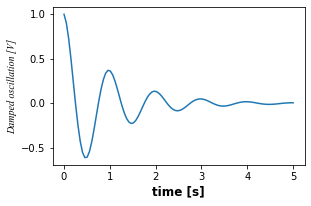

In [5]:
#文本属性的输入一种是通过**kwargs属性这种方式，一种是通过操作 matplotlib.font_manager.FontProperties 方法
#该案例中对于x_label采用**kwargs调整字体属性，y_label则采用 matplotlib.font_manager.FontProperties 方法调整字体属性
#该链接是FontProperties方法的介绍 https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]', fontsize='large', fontweight='bold')
ax.set_ylabel('Damped oscillation [V]', fontproperties=font)

plt.show()

### 字体的属性设置

In [6]:
#该block讲述如何在matplotlib里面，修改字体默认属性，完成全局字体的更改。
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

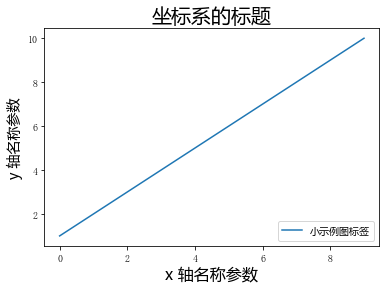

In [7]:
#局部字体的修改方法1
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')

# 直接用字体的名字。
plt.xlabel('x 轴名称参数', fontproperties='Microsoft YaHei', fontsize=16)         # 设置x轴名称，采用微软雅黑字体
plt.ylabel('y 轴名称参数', fontproperties='Microsoft YaHei', fontsize=14)         # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties='Microsoft YaHei', fontsize=20)         # 设置坐标系标题的字体
plt.legend(loc='lower right', prop={"family": 'Microsoft YaHei'}, fontsize=10)    # 小示例

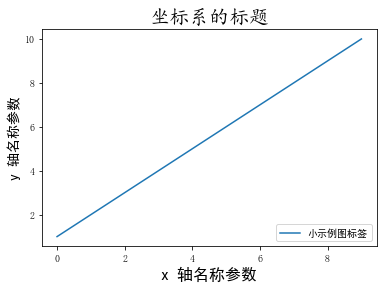

In [8]:
#局部字体的修改方法2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')
#fname为你系统中的字体库路径
my_font1 = fontmg.FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')      # 读取系统中的 黑体 字体。
my_font2 = fontmg.FontProperties(fname=r'C:\Windows\Fonts\simkai.ttf')      # 读取系统中的 楷体 字体。
# fontproperties 设置中文显示，fontsize 设置字体大小
plt.xlabel('x 轴名称参数', fontproperties=my_font1, fontsize=16)       # 设置x轴名称
plt.ylabel('y 轴名称参数', fontproperties=my_font1, fontsize=14)       # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties=my_font2, fontsize=20)       # 标题的字体设置
plt.legend(loc='lower right', prop=my_font1, fontsize=10)              # 小示例图的字体设置

### 数学表达式

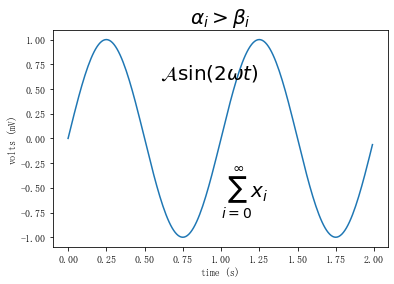

In [9]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

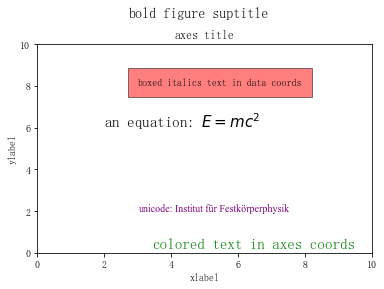

In [10]:
#这是对前七节学习内容的总结案例
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# 分别在figure和subplot上设置title
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x-axis和y-axis的范围都是[0, 10]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
font1 = {'family': 'Times New Roman',
        'color':  'purple',
        'weight': 'normal',
        'size': 10,
        }
ax.text(3, 2, 'unicode: Institut für Festkörperphysik',fontdict=font1)
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

plt.show()

## Tick上的文本

设置tick（刻度）和ticklabel（刻度标签）也是可视化中经常需要操作的步骤，matplotlib既提供了自动生成刻度和刻度标签的模式（默认状态），同时也提供了许多让使用者灵活设置的方式。

### 简单模式

可以使用axis的set_ticks方法手动设置标签位置，使用axis的set_ticklabels方法手动设置标签格式

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

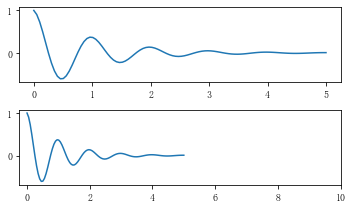

In [13]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.))
plt.show()

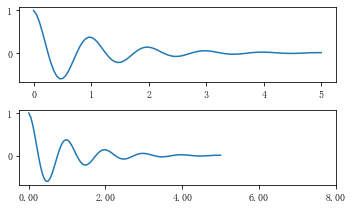

In [14]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla)
plt.show()

<a list of 14 Line2D ticklines objects>


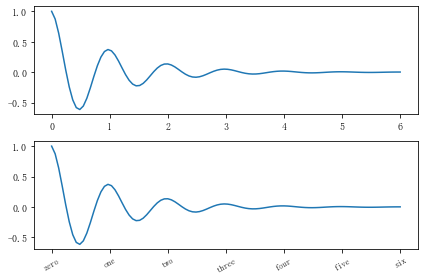

In [15]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应，然后再通过set_xticklabels设置刻度所对应的标签
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
x1 = np.linspace(0.0, 6.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
axs[0].plot(x1, y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1, y1)
axs[1].set_xticks([0,1,2,3,4,5,6])#要将x轴的刻度放在数据范围中的哪些位置
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],#设置刻度对应的标签
                   rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度。
axs[1].xaxis.set_ticks_position('bottom')#set_ticks_position()方法是用来设置刻度所在的位置，常用的参数有bottom、top、both、none
print(axs[1].xaxis.get_ticklines())
plt.show()

### Tick Locators and Formatters

除了上述的简单模式，还可以使用Tick Locators and Formatters完成对于刻度位置和刻度标签的设置。 其中Axis.set_major_locator和Axis.set_minor_locator方法用来设置标签的位置，Axis.set_major_formatter和Axis.set_minor_formatter方法用来设置标签的格式。这种方式的好处是不用显式地列举出刻度值列表。

set_major_formatter和set_minor_formatter这两个formatter格式命令可以接收字符串格式（matplotlib.ticker.StrMethodFormatter）或函数参数（matplotlib.ticker.FuncFormatter）来设置刻度值的格式 。

1. Tick Formatters

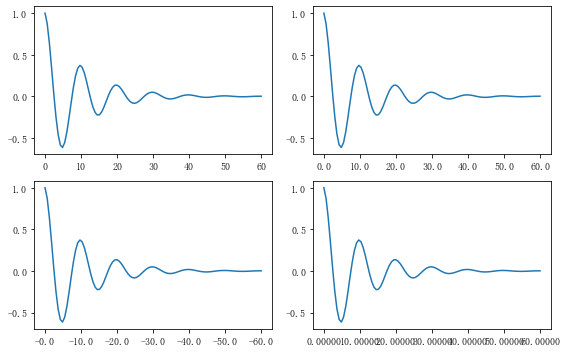

In [16]:
# 接收字符串格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter)

plt.show()

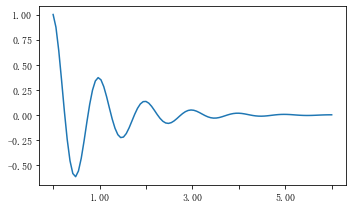

In [17]:
# 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(formatoddticks)
plt.show()

2. Tick Locators

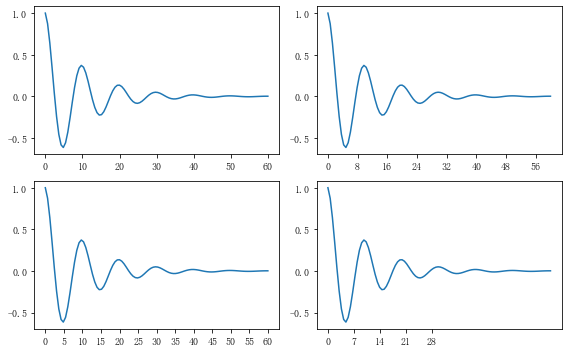

In [19]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=10)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator)

plt.show()

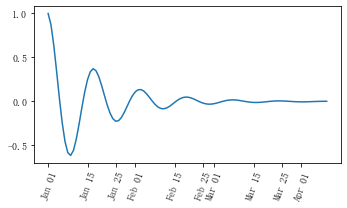

In [20]:
import matplotlib.dates as mdates
import datetime
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

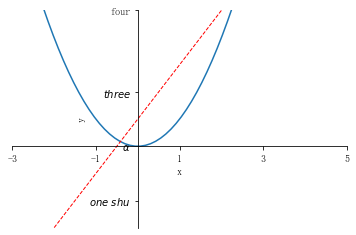

In [21]:
#这个案例中展示了如何进行坐标轴的移动，如何更改刻度值的样式
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2
plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle = '--')
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.xlabel('x')
plt.ylabel('y')
new_ticks1 = np.linspace(-3,5,5)
plt.xticks(new_ticks1)
plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])
'''
上一行代码是将y轴上的小标改成文字,其中，空格需要增加\，即'\ ',$可将格式更改成数字模式，如果需要输入数学形式的α，则需要用\转换，即\alpha
如果使用面向对象的命令进行画图，那么下面两行代码可以实现与 plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four']) 同样的功能
axs.set_yticks([-2,0,2,5])
axs.set_yticklabels([r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])
'''
ax = plt.gca()#gca = 'get current axes' 获取现在的轴
'''
ax = plt.gca()是获取当前的axes，其中gca代表的是get current axes。
fig=plt.gcf是获取当前的figure，其中gcf代表的是get current figure。

许多函数都是对当前的Figure或Axes对象进行处理，
例如plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax，然后再调用ax.plot()方法实现真正的绘图。

而在本例中则可以通过ax.spines方法获得当前顶部和右边的轴并将其颜色设置为不可见
然后将左边轴和底部的轴所在的位置重新设置
最后再通过set_ticks_position方法设置ticks在x轴或y轴的位置，本示例中因所设置的bottom和left是ticks在x轴或y轴的默认值，所以这两行的代码也可以不写
'''
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))#axes 百分比
ax.xaxis.set_ticks_position('bottom')   #设置ticks在x轴的位置
ax.yaxis.set_ticks_position('left')     #设置ticks在y轴的位置
plt.show()


## legend（图例）

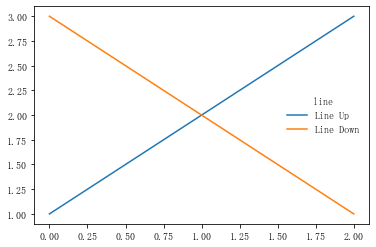

In [22]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'],loc=5, title='line',frameon=False)#loc

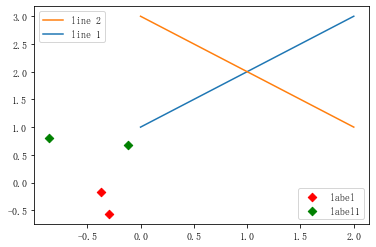

In [23]:
#这个案例是显示多图例legend
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(-1, 1, 4)
y = np.random.uniform(-1, 1, 4)
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
l1 = plt.legend([p2, p1], ["line 2", "line 1"], loc='upper left')
 
p3 = plt.scatter(x[0:2], y[0:2], marker = 'D', color='r')
p4 = plt.scatter(x[2:], y[2:], marker = 'D', color='g')
# 下面这行代码由于添加了新的legend，所以会将l1从legend中给移除
plt.legend([p3, p4], ['label', 'label1'], loc='lower right', scatterpoints=1)
# 为了保留之前的l1这个legend，所以必须要通过plt.gca()获得当前的axes，然后将l1作为单独的artist
plt.gca().add_artist(l1)

# 第五回：样式色彩秀芳华

第五回详细介绍matplotlib中样式和颜色的使用，绘图样式和颜色是丰富可视化图表的重要手段，因此熟练掌握本章可以让可视化图表变得更美观，突出重点和凸显艺术性。
关于绘图样式，常见的有4种方法，分别是修改预定义样式，自定义样式，rcparams和matplotlibrc文件。
关于颜色使用，本章介绍了常见的5种表示单色颜色的基本方法，以及colormap多色显示的方法。

## matplotlib的绘图样式（style）

在matplotlib中，要想设置绘制样式，最简单的方法是在绘制元素时单独设置样式。 但是有时候，当用户在做专题报告时，往往会希望保持整体风格的统一而不用对每张图一张张修改，因此matplotlib库还提供了四种批量修改全局样式的方式。

### matplotlib预先定义样式

matplotlib贴心地提供了许多内置的样式供用户使用，使用方法很简单，只需在python脚本的最开始输入想使用style的名称即可调用，尝试调用不同内置样式，比较区别。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

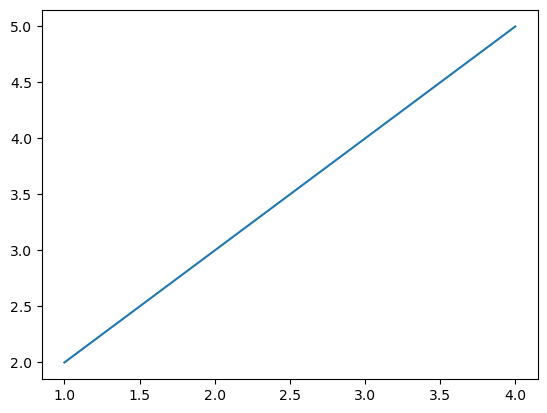

In [2]:
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5]);

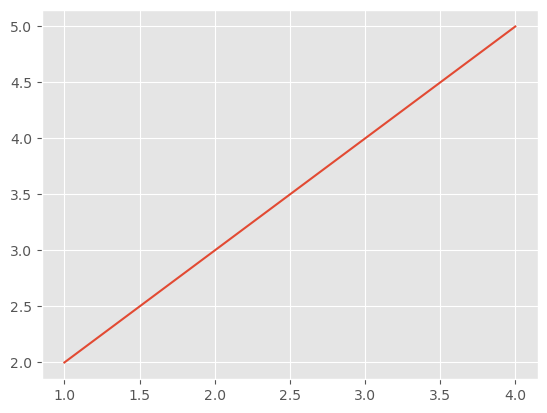

In [3]:
plt.style.use('ggplot')
plt.plot([1,2,3,4],[2,3,4,5]);

那么matplotlib究竟内置了那些样式供使用呢？总共以下26种丰富的样式可供选择。

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 用户自定义stylesheet

在任意路径下创建一个后缀名为mplstyle的样式清单，编辑文件添加以下样式内容

>axes.titlesize : 24  
axes.labelsize : 20  
lines.linewidth : 3  
lines.markersize : 10  
xtick.labelsize : 16  
ytick.labelsize : 16  

引用自定义stylesheet后观察图表变化。

In [5]:
plt.style.use('file/presentation.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5]);

OSError: 'file/presentation.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

值得特别注意的是，matplotlib支持混合样式的引用，只需在引用时输入一个样式列表，若是几个样式中涉及到同一个参数，右边的样式表会覆盖左边的值。

In [6]:
plt.style.use(['dark_background', 'file/presentation.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5]);

OSError: 'file/presentation.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

### 设置rcparams

我们还可以通过修改默认rc设置的方式改变样式，所有rc设置都保存在一个叫做 matplotlib.rcParams的变量中。
修改过后再绘图，可以看到绘图样式发生了变化。

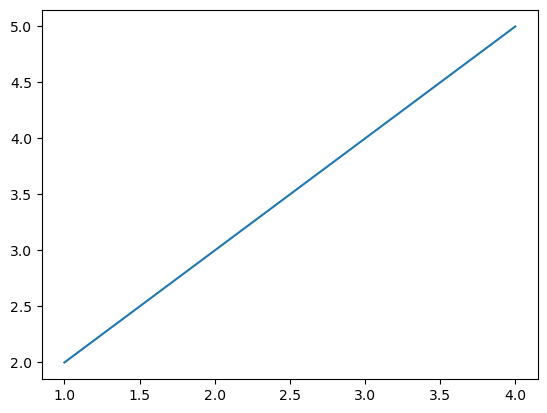

In [7]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5]);

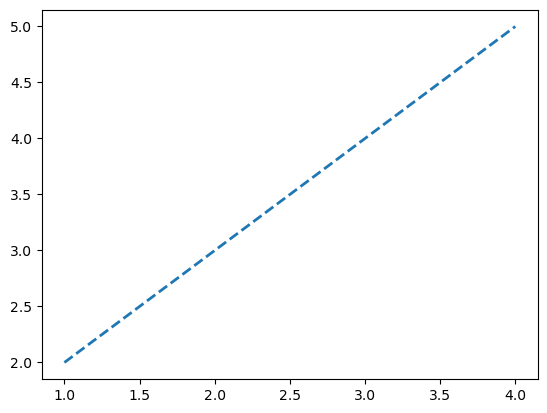

In [8]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5]);

另外matplotlib也还提供了了一种更便捷的修改样式方式，可以一次性修改多个样式。

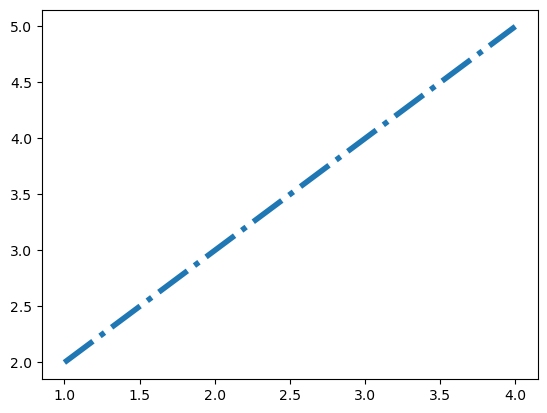

In [12]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5]);

### 修改matplotlibrc文件

由于matplotlib是使用matplotlibrc文件来控制样式的，也就是上一节提到的rc setting，所以我们还可以通过修改matplotlibrc文件的方式改变样式。

In [13]:
# 查找matplotlibrc文件的路径
mpl.matplotlib_fname()|

SyntaxError: invalid syntax (Temp/ipykernel_46216/3365076468.py, line 2)

找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如lines.linewidth: 8，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。

## matplotlib的色彩设置（color）

在可视化中，如何选择合适的颜色和搭配组合也是需要仔细考虑的，色彩选择要能够反映出可视化图像的主旨。  
从可视化编码的角度对颜色进行分析，可以将颜色分为色相、亮度和饱和度三个视觉通道。通常来说：  
`色相`： 没有明显的顺序性、一般不用来表达数据量的高低，而是用来表达数据列的类别。  
`明度和饱和度`： 在视觉上很容易区分出优先级的高低、被用作表达顺序或者表达数据量视觉通道。  
具体关于色彩理论部分的知识，不属于本教程的重点，请参阅有关拓展材料学习。  
ECharts数据可视化实验室  
学会这6个可视化配色基本技巧，还原数据本身的意义 

在matplotlib中，设置颜色有以下几种方式：

### RGB或RGBA

In [14]:
plt.style.use('default')

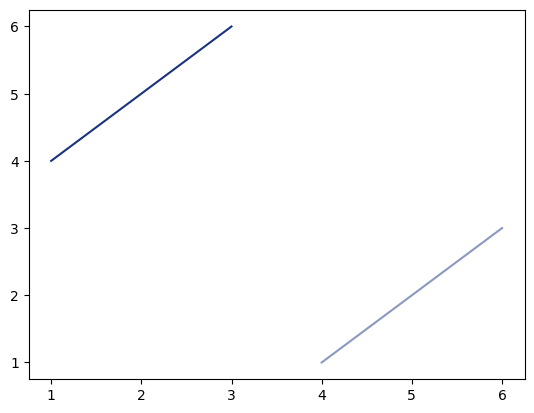

In [15]:
# 颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5));

### HEX RGB 或 RGBA

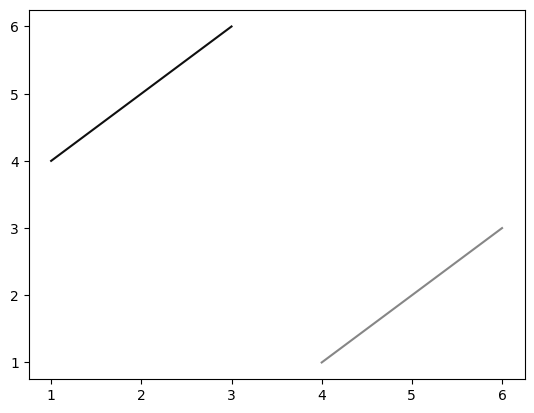

In [16]:
# 用十六进制颜色码表示，同样最后两位表示透明度，可省略
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80');

RGB颜色和HEX颜色之间是可以一一对应的，以下网址提供了两种色彩表示方法的转换工具。
https://www.colorhexa.com/

### 灰度色阶

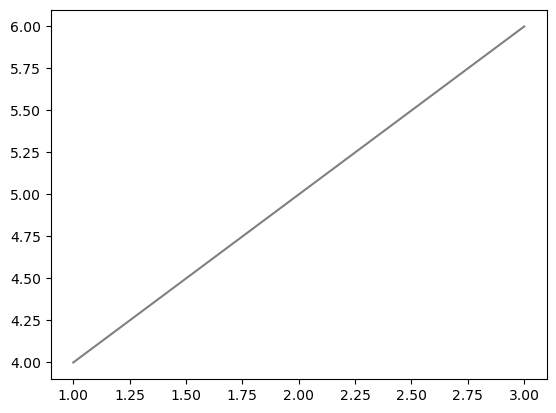

In [17]:
# 当只有一个位于[0,1]的值时，表示灰度色阶
plt.plot([1,2,3],[4,5,6],color='0.5');

### 单字符基本颜色

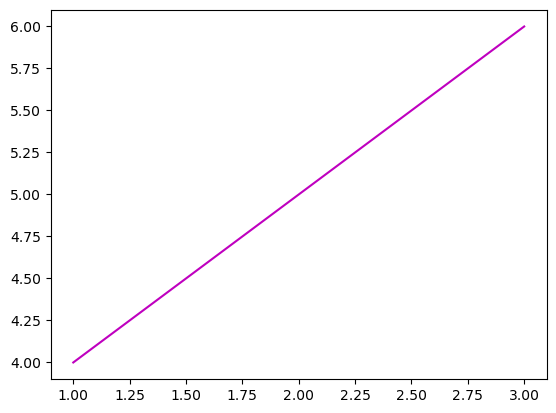

In [18]:
# matplotlib有八个基本颜色，可以用单字符串来表示，分别是'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'，对应的是blue, green, red, cyan, magenta, yellow, black, and white的英文缩写
plt.plot([1,2,3],[4,5,6],color='m');

### 颜色名称

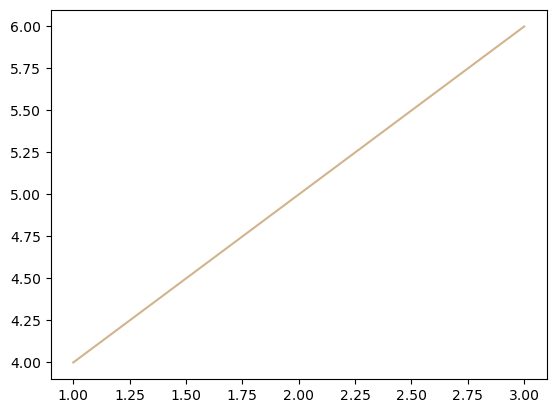

In [19]:
# matplotlib提供了颜色对照表，可供查询颜色对应的名称
plt.plot([1,2,3],[4,5,6],color='tan');

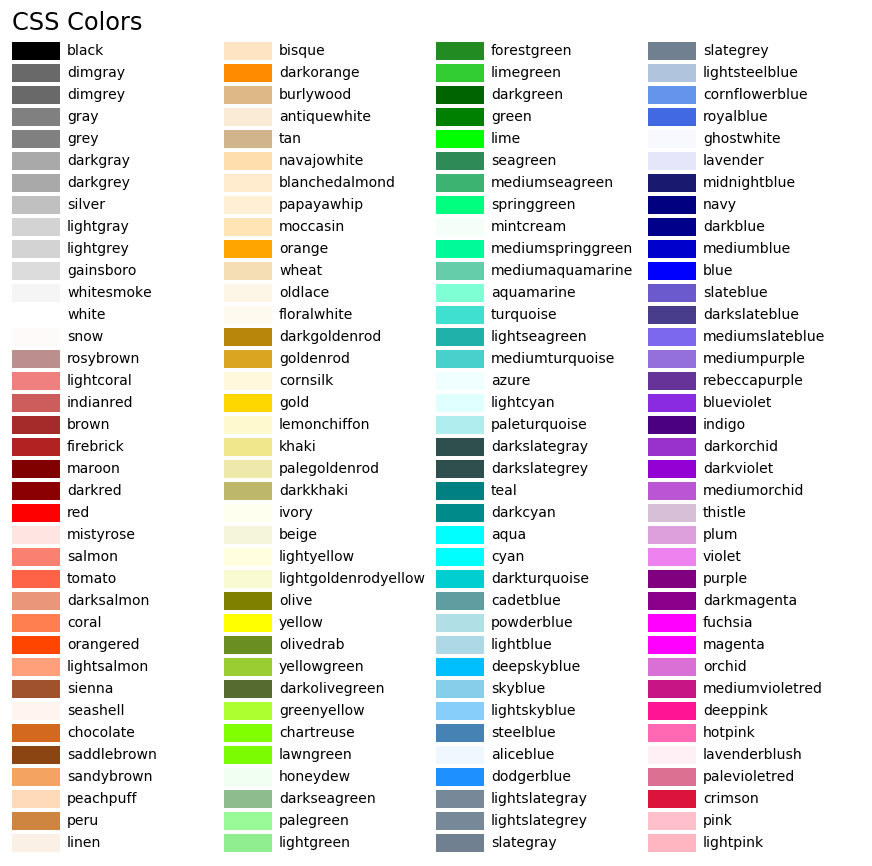

### 使用colormap设置一组颜色

有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:
* 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息。
* 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇;当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
* 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
* 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
* 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

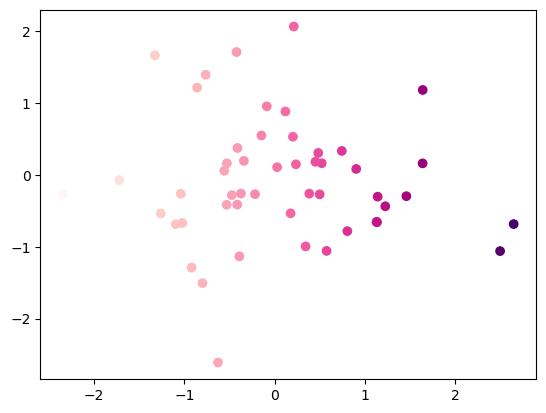

In [20]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu');